In [1]:
# Import library yang dibutuhkan

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
maindf=pd.read_csv('/content/BTC-USD.csv') # masukan file input data harga bitcoin agar bisa di proses, berisi data harga 1 tahun terakhir


print('Jumlah Row: ',maindf.shape[0]) # jumlah baris yang ada pada data
print('Jumlah Columm: ',maindf.shape[1]) # jumlah kolum yang ada pada data


Jumlah Row:  366
Jumlah Columm:  7


In [3]:
#.shape ini adalah method dari pandas yang dipakai untuk melihat bentuk dari data, 
#output (366,7) mengatakan bahwa maindf memiliki 366 baris dan 7 kolum 
maindf.shape 


(366, 7)

In [4]:
maindf.head()#.head() adalah method dari pandas yang dipakai untuk melihat data teratas pada maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-11,36697.031250,37608.695313,36044.449219,37334.398438,37334.398438,3.869974e+10
1,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625,35552.515625,3.792423e+10
2,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375,39097.859375,4.066911e+10
3,2021-06-14,39016.968750,40978.363281,38757.285156,40218.476563,40218.476563,4.314891e+10
4,2021-06-15,40427.167969,41295.269531,39609.468750,40406.269531,40406.269531,4.642015e+10


In [5]:
maindf.tail()#.tail() adalah method dari pandas yang dipakai untuk melihat data terbawah pada maindf

,Date,Open,High,Low,Close,Adj Close,Volume
361,2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,31155.478516,4.077097e+10
362,2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,3.024206e+10
363,2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,2.169200e+10
364,2022-06-10,NaN,NaN,NaN,NaN,NaN,NaN
365,2022-06-11,29084.478516,29197.939453,29084.478516,29197.939453,29197.939453,2.917454e+10


In [6]:
maindf.info()#method info() dari pandas menampilkan info general dari maindf seperti nama columm, jenis data, jumlah data, range dan lain lain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [7]:
maindf.describe() #method describe dari pandas digunakan untuk mendapatkan nilai min, max,count dan berbagai jenis data statistical lainnya

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,43757.420521,44759.126097,42622.971656,43729.111778,43729.111778,3.162764e+10
std,9192.339851,9353.585393,9029.708113,9200.064282,9200.064282,9.362636e+09
min,28622.625000,28814.900391,26350.490234,28627.574219,28627.574219,1.373656e+10
25%,37748.011719,38834.617188,36733.574219,37750.453125,37750.453125,2.549315e+10
50%,42586.464844,43413.023438,41681.957031,42586.917969,42586.917969,3.106491e+10
75%,48268.855469,49347.582031,47045.003906,48199.953125,48199.953125,3.676304e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,8.419661e+10


In [8]:
print('Null Values:',maindf.isnull().values.sum()) #bagian dari preprocessing, line kode ini akan mencari nilai null pada maindf

Null Values: 6


In [9]:
print('NA values:',maindf.isnull().values.any()) #bagian dari preprocessing, line kode ini akan mencari nilai null pada maindf

NA values: True


In [10]:


maindf=maindf.dropna() # bagian dari preprocessing,kode ini akan menghapus row yang berisi null/kosong/tidak ada data

print('Null Values:',maindf.isnull().values.sum())#mengecek kembali apakah data null sudah dibersihkan
print('NA values:',maindf.isnull().values.any())#mengecek kembali apakah data null sudah dibersihkan

Null Values: 0
NA values: False


In [11]:
#bentuk akhir setelah pembersihan nilai null
maindf.shape

(365, 7)

In [12]:
#EDA(Exploratory Data Analysis) 
# EDA dipakai untuk mengexplore dan analisis suatu data set untuk menyimpulkan karakteristik data dan juga gambaran dari data tersebut

sd=maindf.iloc[0][0] #iloc dipakai untuk mengambil data pada maindf yang berupa dataframe, [0][0] artinya iloc akan mengambil data pada baris 0 dan columm 0
ed=maindf.iloc[-1][0] # nomor negative -1 digunakan untuk mengambil satu data terakhir di columm 0, columm 0 adalah 'date'


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2021-06-11
Ending Date 2022-06-11


In [13]:

maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d') #penyesuaian format tanggal

y_2021 = maindf.loc[(maindf['Date'] >= '2021-06-12') #ambil data pada maindf yang memiliki tanggal dari 2021-06-12 sampai 2022-06-11
                     & (maindf['Date'] < '2022-06-11')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1) #hapus columm adj close dan volume


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close
1,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625
2,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375
3,2021-06-14,39016.968750,40978.363281,38757.285156,40218.476563
4,2021-06-15,40427.167969,41295.269531,39609.468750,40406.269531
5,2021-06-16,40168.691406,40516.777344,38176.035156,38347.062500
...,...,...,...,...,...
359,2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109
360,2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875
361,2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516
362,2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469


In [14]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean() 
#variable monthvise akan mengorganisir data berdasarkan tanggal yang ada pada variable y_2021['date'], dan di filter dengan '%B'
# agar muncul perbulan, kemudian .mean akan mencari nilai rata rata tiap bulannya.


new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'] # penamaan ulang tiap bulan
monthvise = monthvise.reindex(new_order, axis=0) # input penamaan ulang bulan pada variable new_order, dan masukan new_order pada axis 0
monthvise #tampilkan data

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,33988.536342,33847.307478
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [15]:
fig = go.Figure() #tampilkan data bulanan

fig.add_trace(go.Bar(
    x=monthvise.index, # ini berisi data bulan
    y=monthvise['Open'], # ini berisi data mean tiap bulan untuk columm 'open'
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index, # ini berisi data bulan
    y=monthvise['Close'], # ini berisi data mean tiap bulan untuk columm 'close'
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan harga open dan close bulanan')
fig.show()

In [16]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
#mengorganisir data berdasarkan tanggal yang ada pada y_2021['date'], kemudian filter berdasarkan bulan dan tampilkan nilai #terendah menggunakan method min() pada kolumm low

monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
#mengorganisir data berdasarkan tanggal yang ada pada y_2021['date'], kemudian filter berdasarkan bulan dan tampilkan nilai 
#tertinggi menggunakan method max() pada kolumm 'low'

monthvise_high = monthvise_high.reindex(new_order, axis=0)
#organisair data dengan penamaan bulan yang bersumber dari new_order, dan masukan penamaan bulan baru itu ke index 0

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
#mengorganisir data berdasarkan tanggal yang ada pada y_2021['date'], kemudian filter berdasarkan bulan dan tampilkan nilai #terendah menggunakan method min() pada kolumm low
monthvise_low = monthvise_low.reindex(new_order, axis=0)
#organisair data dengan penamaan bulan yang bersumber dari new_order, dan masukan penamaan bulan baru itu ke index 0

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index, #ini isinya bulan
    y=monthvise_high, #ini isinya nilai tertinggi pada setiap bulan
    name='Harga Tinggi',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index, #ini isinya bulan
    y=monthvise_low, #ini isinya nilai terendah pada setiap bulan
    name='Harga Rendah',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga tinggi dan rendah tiap bulan')
fig.show()

In [17]:
names = cycle(['Harga Open ','Harga Close ','Harga High','Harga Low '])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Tanggal','value':'Harga'})
fig.update_layout(title_text='Chart analisis harga', font_size=15, font_color='black',legend_title_text=' Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [18]:
#mencoba untuk predict harga close

closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (365, 2)


In [19]:
#tampilkan chart harga close dalam satu tahun terakhir
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Tanggal','close':'Harga Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Harga close Bitcoin selama 1 tahun terakhir ', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [20]:
closedf #
close_stock = closedf.copy() #close_stock dipakai untuk menyimpan value asli, karena closedf akan di proses datanya

In [21]:
# Hapus columm date pada closedf dan 
# persiapan pre-processing dengan menyederhanakan data dalam skala 0-1

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
#print(closedf) gunakan ini untuk melihat data closedf yang telah di pre-processing menggunakan minmaxscaler

(365, 1)


In [22]:
# split data training menjadi 80% dan data testing menjadi 20%
training_size=int(len(closedf)*0.80) #variable training_size akan diisi berdasarkan panjang dari dataframe closedf dikali 0.80
test_size=len(closedf)-training_size # variable test_size akan diisi berdasarkan panjang dataframe closedf dikurangi nilai dari training-size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1] #train_data akan diisi b
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
#print("train_data: ", train_data) pakai ini untuk lihat train_data yang telah mengambil data dari closedf sebanyak 80%
#print("test_data: ", test_data) pakai ini untuk lihat test_data yang telah mengambil data dari closedf sebanyak 20%

train_data:  (292, 1)
test_data:  (73, 1)


In [23]:
# method create_data set dipakai untuk konversi array menjadi matrix, agar dapat dimengerti oleh LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step) # X_train dan y_train
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
#print("X_train: ", X_train) print ini untuk melihat matrix
#print("y_train: ", y_train)print ini untuk melihat matrix
#print("X_test: ", X_test)print ini untuk melihat matrix
#print("y_test", y_test)print ini untuk melihat matrix

X_train:  (276, 15)
y_train:  (276,)
X_test:  (57, 15)
y_test (57,)


In [25]:
# penyesuaian input yang akand dipakai berdasarkan format LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

# print("X_train: ", X_train) print ini untuk lihat data yang sudah dikonversi menyesuaikan format data yang sesuai dengan LSTM
#print("X_test: ", X_test.shape)



X_train:  (276, 15, 1)
X_test:  (57, 15, 1)


In [26]:
# Pembuatan Model LSTM
model=Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
# use early stop to avoid over-fiting 
from tensorflow.keras.callbacks import EarlyStopping

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
 #       verbose=1, mode='auto', restore_best_weights=True)

In [27]:
#from keras.utils.vis_utils import plot_model
#model.summary() 
#plot_model(model, to_file='lstm_model.png', show_shapes=True, 
 #          show_layer_names=True)

In [28]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)
#train model sebanyak 200 kali

Epoch 1/200
9/9 [==============================] - 3s 78ms/step - loss: 0.2018 - val_loss: 0.0105
Epoch 2/200
9/9 [==============================] - 0s 24ms/step - loss: 0.0718 - val_loss: 0.0158
Epoch 3/200
9/9 [==============================] - 0s 24ms/step - loss: 0.0171 - val_loss: 0.0363
Epoch 4/200
9/9 [==============================] - 0s 27ms/step - loss: 0.0102 - val_loss: 0.0119
Epoch 5/200
9/9 [==============================] - 0s 27ms/step - loss: 0.0103 - val_loss: 0.0188
Epoch 6/200
9/9 [==============================] - 0s 24ms/step - loss: 0.0085 - val_loss: 0.0136
Epoch 7/200
9/9 [==============================] - 0s 23ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 8/200
9/9 [==============================] - 0s 25ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 9/200
9/9 [==============================] - 0s 26ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 10/200
9/9 [==============================] - 0s 25ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 11/200
9/9 [=

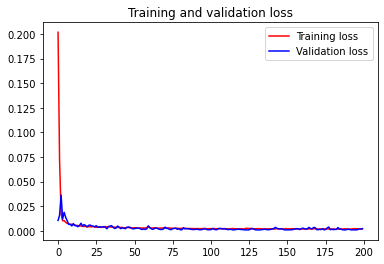

<Figure size 432x288 with 0 Axes>

In [29]:
# output loss dan val_loss dari model LSTM, chart ini digunakan untuk mencari nilai epoch untuk mengoptimasi dan mencari nilai epoch yang tepat
# nilai epoch yang tepat adalah nilai yang didapatkan dari lamanya waktu training dan akurasi yang didapatkan
# jadi, nilai epoch yang tepat adalah nilai epoch yang terkecil, namun tetap menghasilkan akurasi yang tinggi
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [30]:
### lakukan predict menggunakan x_train dan X_test
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((276, 1), (57, 1))

In [31]:
# ubah nilai hasil predict ke value sebelumyna dengan menggunakan inverse, agar dapat diukur tingkat akurasi dan perfomance

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [32]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

#https://stephenallwright.com/good-rmse-score/ referensi untuk melihat nilai rmse yang bagus itu seperti apa
#artikel pada link diatas mengatakan bahwa apabila nilai rmse 1000, tapi data yang dianalisis adalah data expekstasi tingkat kehidupan seseorang,
#maka nilai RMSE itu sangat tidak akurat, sedangkan apabila nilai rmse 1000, tapi data yang dianalisis adalah harga rumah dengan nominal $100.000, 
# maka nilai RMSE itu cukup akurat
#nilai rmse cukup kecil yang berarti akurasi lumayan bagus

Train data RMSE:  1635.286597602602
Train data MSE:  2674162.256298694
Train data MAE:  1233.0931555181164
-------------------------------------------------------------------------------------
Test data RMSE:  1809.2162132372703
Test data MSE:  3273263.306240608
Test data MAE:  1468.9065583574563


In [33]:
#Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))
#variance adalah alat ukur untuk mengetahui perbedaan value yang dianalisis dengan value yang diprediksi
# semakin mendekati nilai 1.0, maka semakin akurat model yang dibuat

Train data explained variance regression score: 0.967398947570115
Test data explained variance regression score: 0.936152904676813


In [34]:
# R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

#r2_square akan mencari tingkat akurasi dari model LSTM
#misal 
# y adalah actual value
# f adalah predicted value
#y = [10, 20, 30]
#f = [30, 10, 20]
# kalau ini dihitung dengan r2_score, nilainya akan -2, karena hasil prediksi tidak ada yang menebak dengan benar

Train data R2 score: 0.9649493587446107
Test data R2 score: 0.8500208845489406


In [35]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

# Mean Gamma deviance regression menghitung jumlah error
# Mean Poisson deviance regression menghitung korelasi antara original_ytrain dan train_predict

Train data MGD:  0.0012770141804838515
Test data MGD:  0.0029802797350995582
----------------------------------------------------------------------
Train data MPD:  57.52802724418257
Test data MPD:  98.30723787832783


In [36]:
#chart yang menampilkan hasil prediksi dengan data original

# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Harga Original close','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': maindf['Date'],
                       'original_close': maindf['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Harga','date': 'Tanggal'})
fig.update_layout(title_text='Perbandingan antara Harga close original  vs Harga Close Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga Close')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [37]:
# coba prediksi 30 hari kedepan

x_input=test_data[len(test_data)-time_step:].reshape(1,-1) #x_input akan berisi data dari test_data
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [38]:

# plotting data 15 hari sebelumnya untuk memprediksi 30 hari kedepan
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [39]:
#tampilkan hasil prediksi 30 hari kedepan
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Harga','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Harga Close')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [40]:
# gabungkan data prediksi 30 hari kedepan dengan data sebelumnya
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Harga'])

fig = px.line(lstmdf,labels={'value': 'Harga','index': 'Timestamp'})
fig.update_layout(title_text='Chart Gabungan antara prediksi dengan data sebelumnya',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Harga')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [41]:
#Note tentang prediksi harga bitcoin
# prediksi ini hanya akurat karena menggunakan data historis dari harga bitcoin
# prediksi ini belum memasukan anomali, event, sentimen dan berbagai jenis parameter lainnya yang dapat mempengarui harga bitcoin, sehingga
# model ini bisa dibilang akurat berdasarkan data historis, tapi tidak akurat jika diimplementasikan pada real life, karena kekurangan yang disebutkan
# sebelumnya.